# G2M insight for Cab Investment firm ( Must for all Specialization)


# EDA section

In [1]:
import numpy as npy
import pandas as pan
import matplotlib.pyplot as matplt
%matplotlib inline
import seaborn as sea
import datetime
from scipy.stats import ttest_1samp

In [2]:
Cab_Data = pan.read_csv("/home/coder_me_ilyas/DataSets-main/Cab_Data.csv")
City = pan.read_csv("/home/coder_me_ilyas/DataSets-main/City.csv")
Customer_ID = pan.read_csv("/home/coder_me_ilyas/DataSets-main/Customer_ID.csv")
Transaction_ID = pan.read_csv("/home/coder_me_ilyas/DataSets-main/Transaction_ID.csv")


In [3]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,01/08/16,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,01/06/16,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,01/02/16,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,01/07/16,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,01/03/16,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [5]:
Cab_Data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,01/08/18,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,01/04/18,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,01/05/18,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,01/05/18,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,01/02/18,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [6]:
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [54]:
Customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income_(USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
Transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [8]:
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [9]:
City.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [10]:
Transaction_ID.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [11]:
Cab_Data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [12]:
Customer_ID.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [13]:
for colum in Cab_Data.columns:
    if ' ' in colum:
        Cab_Data = Cab_Data.rename(columns={colum:colum.replace(' ','_')})

In [14]:
for colum in Customer_ID.columns:
    if ' ' in colum:
        Customer_ID = Customer_ID.rename(columns={colum:colum.replace(' ','_')})

In [15]:
for colum in Transaction_ID.columns:
    if ' ' in colum:
        Transaction_ID = Transaction_ID.rename(columns={colum:colum.replace(' ','_')})

In [16]:
Cab_Data['Date_of_Travel'] = pan.to_datetime(Cab_Data['Date_of_Travel'], format = "%m/%d/%y")

In [17]:
months=[]
years =[]
for i in range(len(Cab_Data['Date_of_Travel'])):
    months.append(Cab_Data['Date_of_Travel'][i].month)
    years.append(Cab_Data['Date_of_Travel'][i].year)
Cab_Data['Month'] = months
Cab_Data['Year'] = years

Cab_Data.drop('Date_of_Travel', axis=1, inplace=True)


In [18]:
PinkCab = Cab_Data[Cab_Data['Company']=='Pink Cab']
YellowCab =Cab_Data[Cab_Data['Company']=='Yellow Cab']

In [19]:
#Joining all the DATA
left = Cab_Data.set_index(['Transaction_ID'])
right = Transaction_ID.set_index(['Transaction_ID'])
data = left.join(right)
data



,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,29290,Card
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,27703,Card
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,28712,Cash
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,28020,Cash
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,27182,Card
...,...,...,...,...,...,...,...,...,...
10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,52392,Cash
10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,53286,Cash
10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,52265,Cash


In [20]:
left = data.set_index([data.index,'Customer_ID'])
right = Customer_ID.set_index(['Customer_ID'])
data = left.join(right)
data


,,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month)
Transaction_ID,Customer_ID,,,,,,,,,,,
10000011,29290,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,Card,Male,28,10813
10000012,27703,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,Card,Male,27,9237
10000013,28712,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,Cash,Male,53,11242
10000014,28020,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,Cash,Male,23,23327
10000015,27182,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,Cash,Male,24,15651
10440104,53286,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,Cash,Male,32,6528
10440105,52265,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,Cash,Male,56,7966


In [21]:

left = data.set_index([data.index,'City'])
right = City.set_index(['City'])
data = left.join(right)
data

,,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
Transaction_ID,Customer_ID,City,,,,,,,,,,,,
10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.6350,1,2016,Card,Male,28,10813,"814,885","24,701"
10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.8540,1,2016,Card,Male,27,9237,"814,885","24,701"
10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.6320,1,2016,Cash,Male,53,11242,"814,885","24,701"
10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.6020,1,2016,Cash,Male,23,23327,"814,885","24,701"
10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.7760,1,2016,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,WASHINGTON DC,Yellow Cab,4.80,69.24,63.3600,1,2018,Cash,Male,24,15651,"418,859","127,001"
10440104,53286,WASHINGTON DC,Yellow Cab,8.40,113.75,106.8480,1,2018,Cash,Male,32,6528,"418,859","127,001"
10440105,52265,WASHINGTON DC,Yellow Cab,27.75,437.07,349.6500,1,2018,Cash,Male,56,7966,"418,859","127,001"


In [22]:

data['Profit'] = data['Price_Charged'] - data['Cost_of_Trip']

In [23]:
data

,,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Profit
Transaction_ID,Customer_ID,City,,,,,,,,,,,,,
10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.6350,1,2016,Card,Male,28,10813,"814,885","24,701",57.3150
10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.8540,1,2016,Card,Male,27,9237,"814,885","24,701",23.6660
10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.6320,1,2016,Cash,Male,53,11242,"814,885","24,701",27.5680
10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.6020,1,2016,Cash,Male,23,23327,"814,885","24,701",25.7980
10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.7760,1,2016,Card,Male,33,8536,"814,885","24,701",16.8440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,WASHINGTON DC,Yellow Cab,4.80,69.24,63.3600,1,2018,Cash,Male,24,15651,"418,859","127,001",5.8800
10440104,53286,WASHINGTON DC,Yellow Cab,8.40,113.75,106.8480,1,2018,Cash,Male,32,6528,"418,859","127,001",6.9020
10440105,52265,WASHINGTON DC,Yellow Cab,27.75,437.07,349.6500,1,2018,Cash,Male,56,7966,"418,859","127,001",87.4200


In [24]:
data.shape

(359392, 13)

In [25]:
data.describe()

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income_(USD/Month),Profit
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113,7.500434,2017.045199,35.336705,15048.822937,137.253198
std,12.233526,274.378911,157.993661,3.445095,0.800239,12.594234,7969.409482,160.311840
min,1.900000,15.600000,19.000000,1.000000,2016.000000,18.000000,2000.000000,-220.060000
25%,12.000000,206.437500,151.200000,5.000000,2016.000000,25.000000,8424.000000,28.012000
50%,22.440000,386.360000,282.480000,8.000000,2017.000000,33.000000,14685.000000,81.962000
75%,32.960000,583.660000,413.683200,10.000000,2018.000000,42.000000,21035.000000,190.030000
max,48.000000,2048.030000,691.200000,12.000000,2018.000000,65.000000,35000.000000,1463.966000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 359392 entries, (10000011, 29290, 'ATLANTA GA') to (10440107, 52917, 'WASHINGTON DC')
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Company             359392 non-null  object 
 1   KM_Travelled        359392 non-null  float64
 2   Price_Charged       359392 non-null  float64
 3   Cost_of_Trip        359392 non-null  float64
 4   Month               359392 non-null  int64  
 5   Year                359392 non-null  int64  
 6   Payment_Mode        359392 non-null  object 
 7   Gender              359392 non-null  object 
 8   Age                 359392 non-null  int64  
 9   Income_(USD/Month)  359392 non-null  int64  
 10  Population          359392 non-null  object 
 11  Users               359392 non-null  object 
 12  Profit              359392 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 50.9+ MB


In [27]:
data.drop_duplicates(inplace=True) 
sum(Cab_Data.duplicated())

0

In [28]:
data.nunique()

Company                    2
KM_Travelled             874
Price_Charged          99176
Cost_of_Trip           16291
Month                     12
Year                       3
Payment_Mode               2
Gender                     2
Age                       48
Income_(USD/Month)     22725
Population                19
Users                     19
Profit                301825
dtype: int64

In [29]:
data.isnull().sum()

Company               0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Month                 0
Year                  0
Payment_Mode          0
Gender                0
Age                   0
Income_(USD/Month)    0
Population            0
Users                 0
Profit                0
dtype: int64

<AxesSubplot:ylabel='City,Company'>

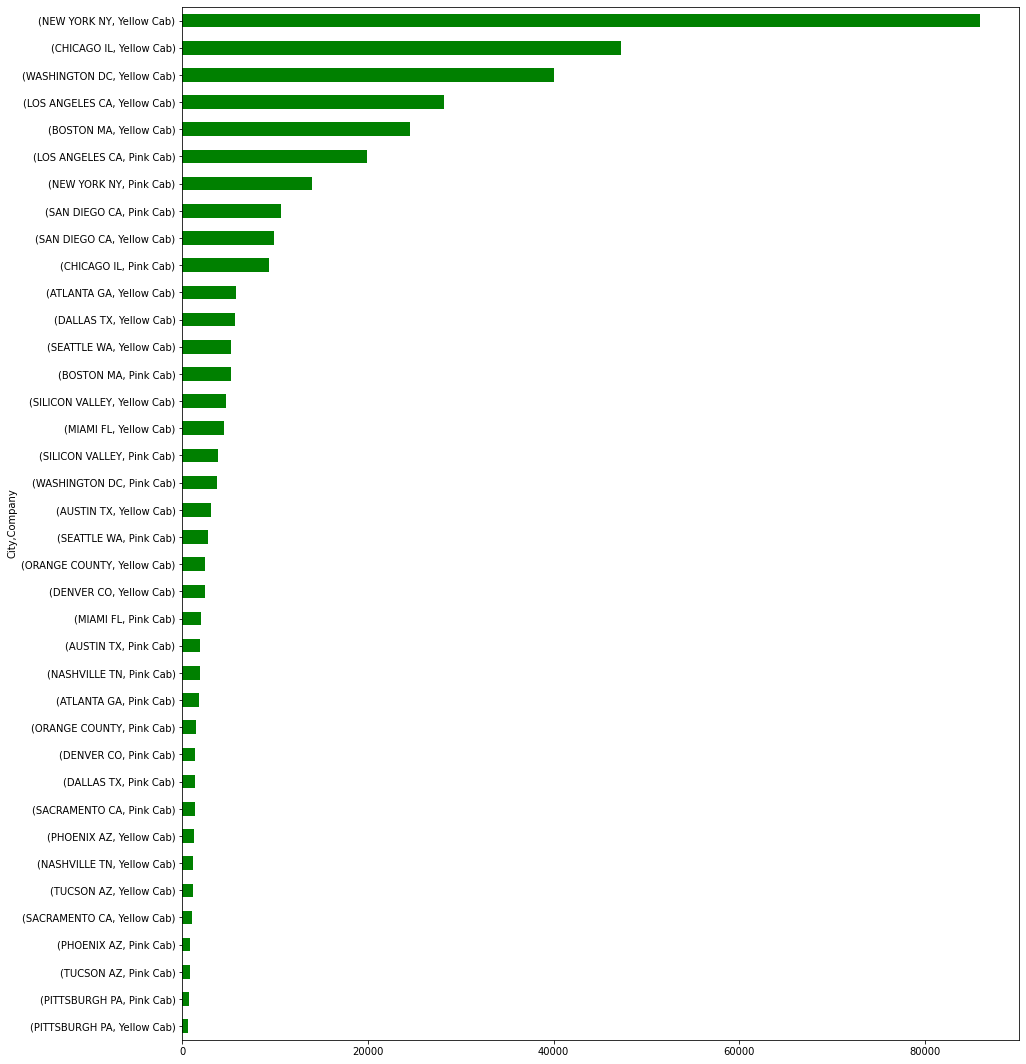

In [57]:

matplt.figure(figsize=(15, 19))
groupby_City = data.groupby('City')
groupby_City['Company'].value_counts().sort_values(ascending=True).plot.barh(color = "Green")

In [31]:
groupby_City = data.groupby('City')
groupby_City['Company'].value_counts()

City            Company   
ATLANTA GA      Yellow Cab     5795
                Pink Cab       1762
AUSTIN TX       Yellow Cab     3028
                Pink Cab       1868
BOSTON MA       Yellow Cab    24506
                Pink Cab       5186
CHICAGO IL      Yellow Cab    47264
                Pink Cab       9361
DALLAS TX       Yellow Cab     5637
                Pink Cab       1380
DENVER CO       Yellow Cab     2431
                Pink Cab       1394
LOS ANGELES CA  Yellow Cab    28168
                Pink Cab      19865
MIAMI FL        Yellow Cab     4452
                Pink Cab       2002
NASHVILLE TN    Pink Cab       1841
                Yellow Cab     1169
NEW YORK NY     Yellow Cab    85918
                Pink Cab      13967
ORANGE COUNTY   Yellow Cab     2469
                Pink Cab       1513
PHOENIX AZ      Yellow Cab     1200
                Pink Cab        864
PITTSBURGH PA   Pink Cab        682
                Yellow Cab      631
SACRAMENTO CA   Pink Cab       1334
 

Text(0, 0.5, 'Yearly Profit')

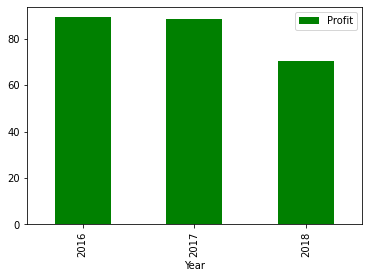

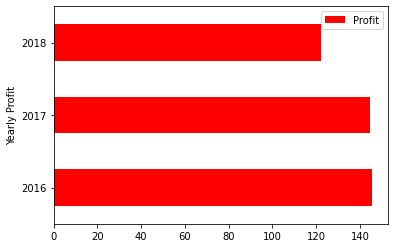

In [32]:
Yearly_group = data.groupby(['Year'])
(Yearly_group[['Profit']].median().plot.bar(color= "Green"))

((Yearly_group[['Profit']].mean())).plot.barh(color= "Red").plot(kind='bar', figsize=(14,8))
matplt.ylabel("Yearly Profit")

Text(0, 0.5, 'Monthly Profit')

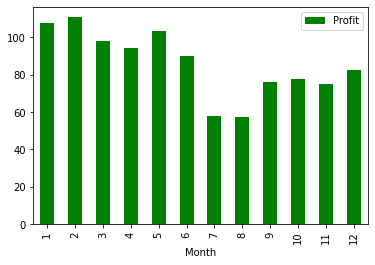

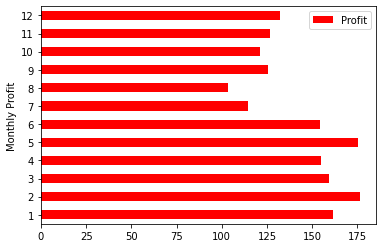

In [33]:
Monthly_group = data.groupby(['Month'])
(Monthly_group[['Profit']].median().plot.bar(color= "Green"))

((Monthly_group[['Profit']].mean()).plot.barh(color= "Red")).plot(kind='bar', figsize=(14,8))
matplt.ylabel("Monthly Profit")

Text(0, 0.5, 'Profit')

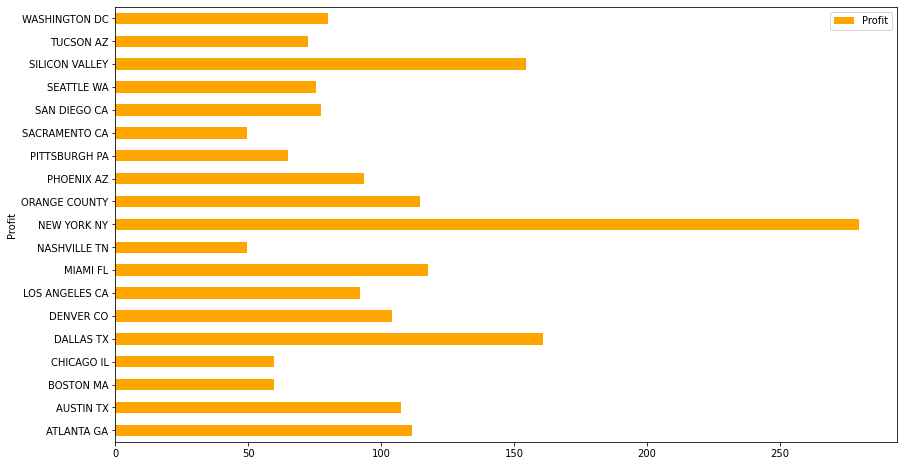

In [61]:
((groupby_City[['Profit']].mean())).plot(kind='barh', figsize=(14, 8), color = "orange")
matplt.ylabel("Profit")

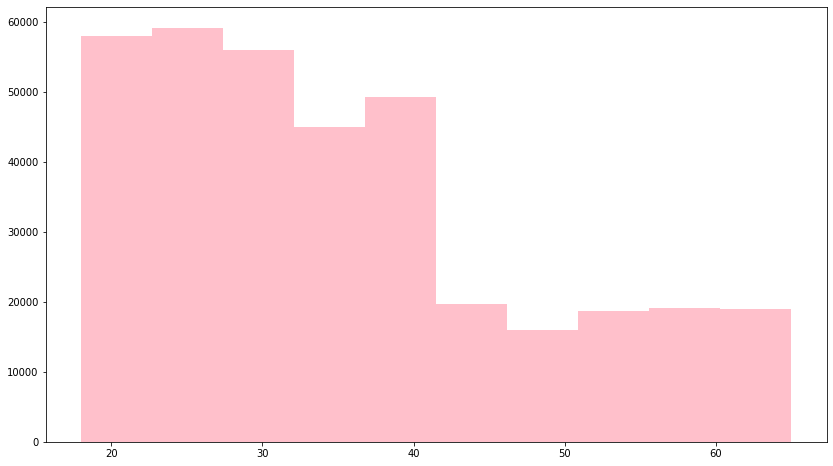

In [34]:
matplt.figure(figsize=(14,8))
matplt.hist(data.Age, bins=10, color='pink')
matplt.show()

Text(0, 0.5, 'Profit')

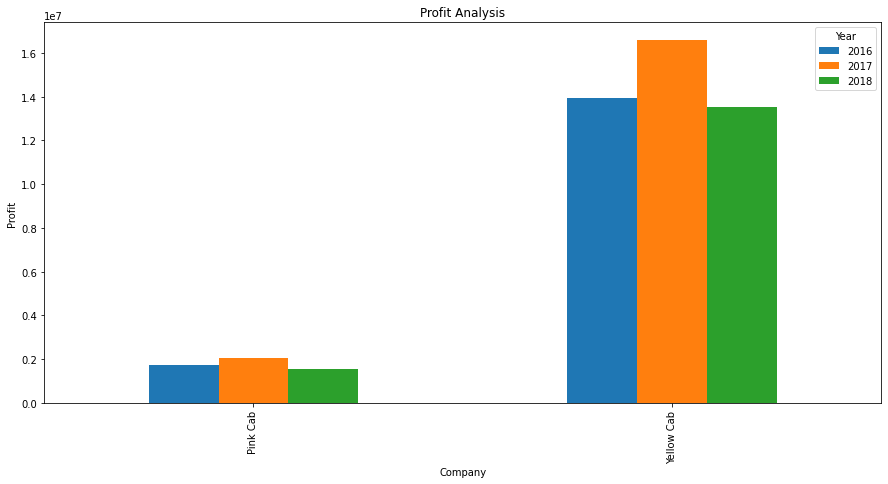

In [35]:
(data.pivot_table(index='Company', 
                  columns='Year', values='Profit', 
                  aggfunc='sum')).plot(kind='bar', 
                                       figsize=(15,7), 
                                       title='Profit Analysis')
matplt.ylabel("Profit")

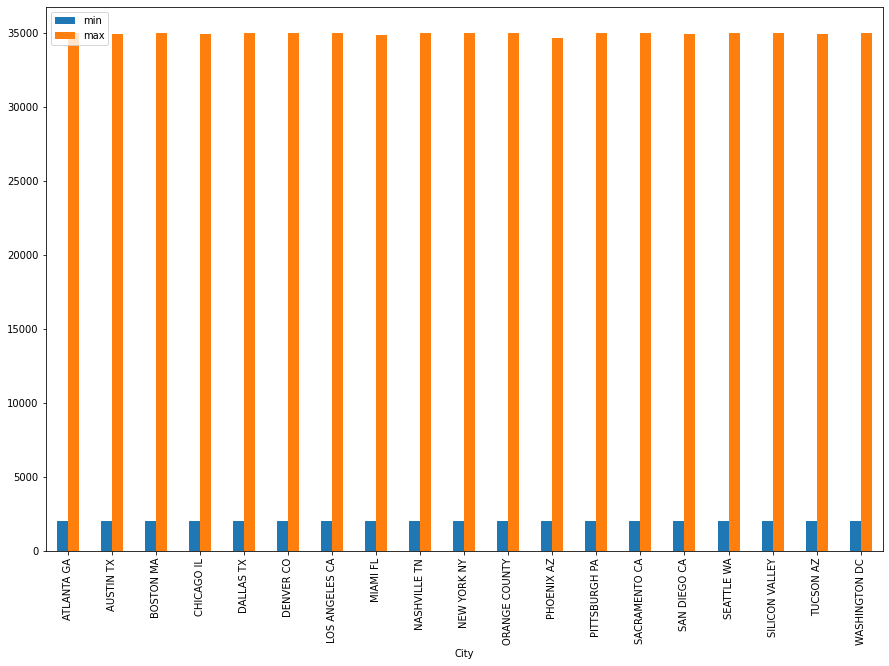

In [58]:
(groupby_City['Income_(USD/Month)'].agg(['min', 'max'])).plot(kind='bar', figsize=(15,10)); 

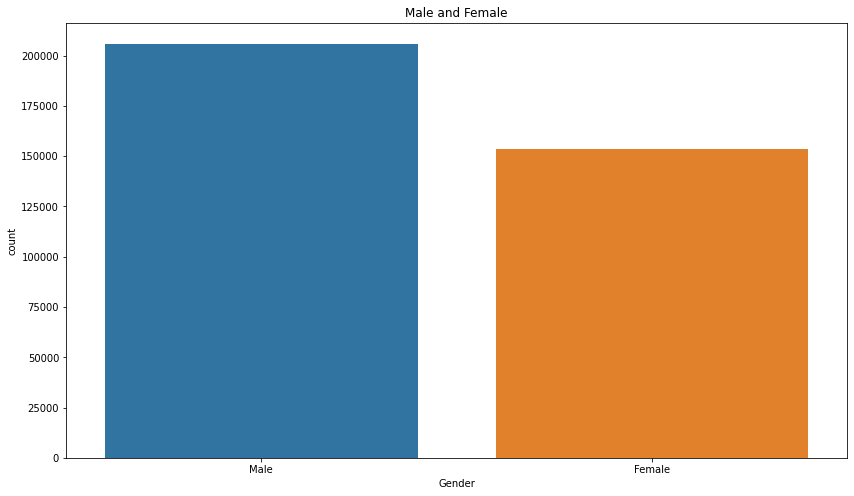

In [37]:
matplt.figure(figsize=(14,8))
g=sea.countplot(x = 'Gender', data = data);
g.set_title('Male and Female')
matplt.show()

In [38]:
data['Payment_Mode'].value_counts()

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

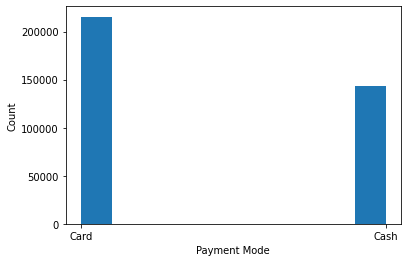

In [39]:
matplt.hist(data.Payment_Mode)
matplt.ylabel("Count")
matplt.xlabel("Payment Mode")
matplt.show()

In [56]:
YellowCab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274681 entries, 233 to 359391
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction_ID  274681 non-null  int64  
 1   Company         274681 non-null  object 
 2   City            274681 non-null  object 
 3   KM_Travelled    274681 non-null  float64
 4   Price_Charged   274681 non-null  float64
 5   Cost_of_Trip    274681 non-null  float64
 6   Month           274681 non-null  int64  
 7   Year            274681 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 18.9+ MB


In [55]:
PinkCab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84711 entries, 0 to 357453
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  84711 non-null  int64  
 1   Company         84711 non-null  object 
 2   City            84711 non-null  object 
 3   KM_Travelled    84711 non-null  float64
 4   Price_Charged   84711 non-null  float64
 5   Cost_of_Trip    84711 non-null  float64
 6   Month           84711 non-null  int64  
 7   Year            84711 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 5.8+ MB


# Hypothesis section

In [40]:
data.describe()

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income_(USD/Month),Profit
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113,7.500434,2017.045199,35.336705,15048.822937,137.253198
std,12.233526,274.378911,157.993661,3.445095,0.800239,12.594234,7969.409482,160.311840
min,1.900000,15.600000,19.000000,1.000000,2016.000000,18.000000,2000.000000,-220.060000
25%,12.000000,206.437500,151.200000,5.000000,2016.000000,25.000000,8424.000000,28.012000
50%,22.440000,386.360000,282.480000,8.000000,2017.000000,33.000000,14685.000000,81.962000
75%,32.960000,583.660000,413.683200,10.000000,2018.000000,42.000000,21035.000000,190.030000
max,48.000000,2048.030000,691.200000,12.000000,2018.000000,65.000000,35000.000000,1463.966000


In [41]:
sample = int((10/100)*len(data))

In [42]:
#KM Travelled

In [43]:

KM = npy.random.choice(data["KM_Travelled"], sample)
tset, pval = ttest_1samp(KM, 22.44)
print("p-values",pval)
if pval < 0.05:  
    print("Rejecting null hypothesis")
else:
    print("Accepting null hypothesis")

p-values 0.18169006003306146
Accepting null hypothesis


In [44]:
#Price Charged

In [45]:
Price = npy.random.choice(data["Price_Charged"],sample)
tset, pval = ttest_1samp(Price, 286.19)
print("p-values",pval)
if pval < 0.05:   
    print("Rejecting null hypothesis")
else:
    print("Accepting null hypothesis")

p-values 0.0
Rejecting null hypothesis


In [46]:
#Age

In [47]:
age = npy.random.choice(data["Age"],sample)
tset, pval = ttest_1samp(age, 35)
print("p-values",pval)
if pval < 0.05:
    print("Rejecting null hypothesis")
else:
    print("Accepting null hypothesis")

p-values 2.7448440477267148e-09
Rejecting null hypothesis


In [48]:
#Income

In [49]:
Income = npy.random.choice(data["Income_(USD/Month)"],sample)
tset, pval = ttest_1samp(Income, 15048.8)
print("p-values",pval)
if pval < 0.05:    
    print("Rejecting null hypothesis")
else:
    print("Accepting null hypothesis")


p-values 0.2460825218103922
Accepting null hypothesis


In [50]:
#Profit

In [51]:
profit = npy.random.choice(data["Profit"],sample)
tset, pval = ttest_1samp(profit, 137.25)
print("p-values",pval)
if pval < 0.05:    
    print("Rejecting null hypothesis")
else:
    print("Accepting null hypothesis")

p-values 0.6624853442187473
Accepting null hypothesis


# Summary

No duplicate data was found.
No null.
New york city has the highest yellow cab.
Card is used and preferred most than Cash.
Most of the customers are between 20 - 40 years old.
NEW YORK NY, DALLAS TX, SILICON VALLEY and MIAMI FL are the top cities with the highest profit.